# <font color='green'> <center>LetsGrowMore</center></font>
# <font color='greenish'> <center>Data Science Intern</center></font>

## <font color='black'> <center><b>Task Name:<b>  Prediction Using Decision Tree Algorithm</center></font>

### <font color='orange'>About Task:</font>

#### Create the Decision Tree Classifier and visualize it graphically.  The Purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.


### <font color='cyan'>Author:</font>


#### DHANUSH M

### **Preprocessing**

#### **importing necessary packages**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
%matplotlib inline 

#### ***Loading Dataset***

In [3]:
iris_data=pd.read_csv("iris.csv")

In [4]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### **Removing Unwanted columns**

In [5]:
iris_data.duplicated().sum()

0

In [6]:
#romoving id attribute because it's not important for classification
iris_data.drop("Id",axis=1,inplace=True)

In [7]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### **Checking Duplicates**

In [8]:
#again checking duplicate
iris_data.duplicated().sum()

3

In [9]:
iris_data[iris_data.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [10]:
iris_data.shape

(150, 5)

#### **Removing duplicate rows**

In [11]:
#drop duplicated
iris_data.drop_duplicates(inplace=True)

In [12]:
iris_data.shape

(147, 5)

In [13]:
columns=list(iris_data.columns)
print(columns)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [14]:
iris_data[columns[-1]].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### **Label Encoding**

In [15]:
#tranform categorical data into numerical data
#applying one Label encoding for 'Species' Column
encoder=LabelEncoder()
numeric_species=encoder.fit_transform(iris_data[['Species']])

C:\Users\Dhanush m\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
numeric_species

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
iris_data['species']=numeric_species

In [18]:
iris_data['species'].unique()

array([0, 1, 2])

In [19]:
iris_data[columns[-1]].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
species=list(iris_data[columns[-1]].unique())

In [21]:
iris_df=iris_data.drop('Species',axis=1)

In [22]:
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
iris_df=iris_df.rename(columns={'species':'Species'})

### **Train & Test Splitting**

In [29]:
#splitting train and test data
X_train,X_test,y_train,y_test=train_test_split(iris_df.drop('Species',axis=1),iris_df['Species'],test_size=0.2)

In [30]:
train=iris_df.drop('Species',axis=1)
target=iris_df['Species']

In [31]:
X_train.shape

(117, 4)

In [32]:
X_test.shape

(30, 4)

In [33]:
y_train.shape

(117,)

### **Visualizing train and target**

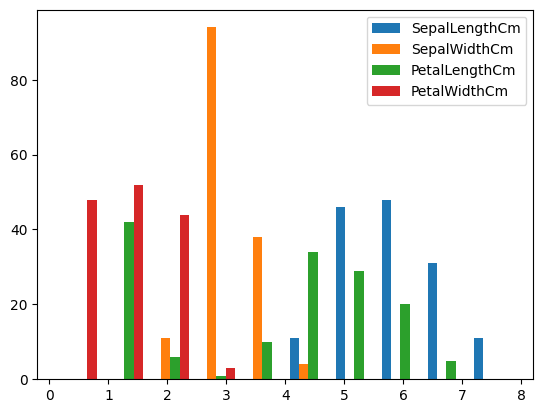

In [95]:
plt.hist(train,label=columns)
plt.legend()
plt.show()

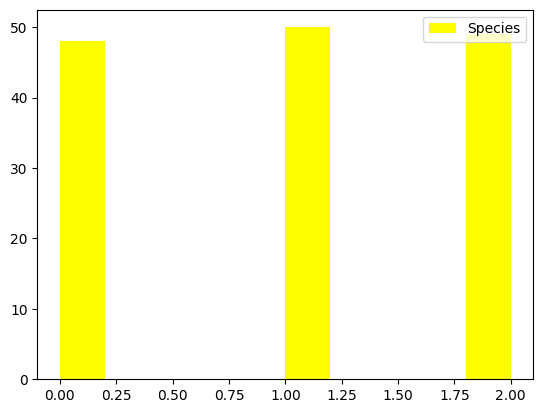

In [97]:
plt.hist(target,label=columns[-1],color='yellow')
plt.legend()
plt.show()

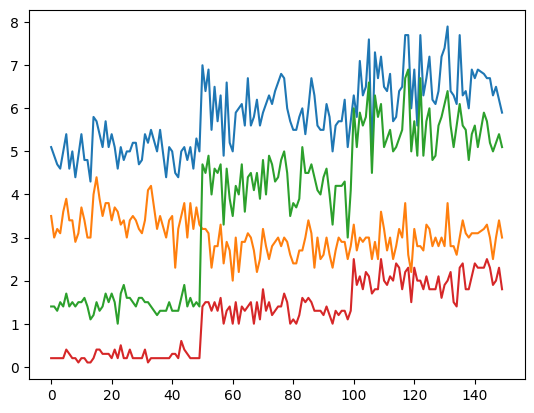

In [83]:
plt.plot(train)

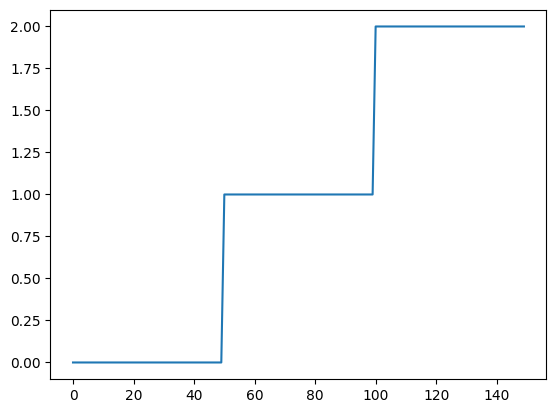

In [70]:
plt.plot(target)

### **Decission Tree Classification for iris dataset**

In [45]:
#create Decission Tree model
DTree=DecisionTreeClassifier()
iris_model=DTree.fit(X_train,y_train)

In [46]:
#checking accuracy
predict=iris_model.predict(X_test)

In [47]:
print(f'The Accuracy of this model is : {accuracy_score(y_test,predict)*100}')

The Accuracy of this model is : 93.33333333333333


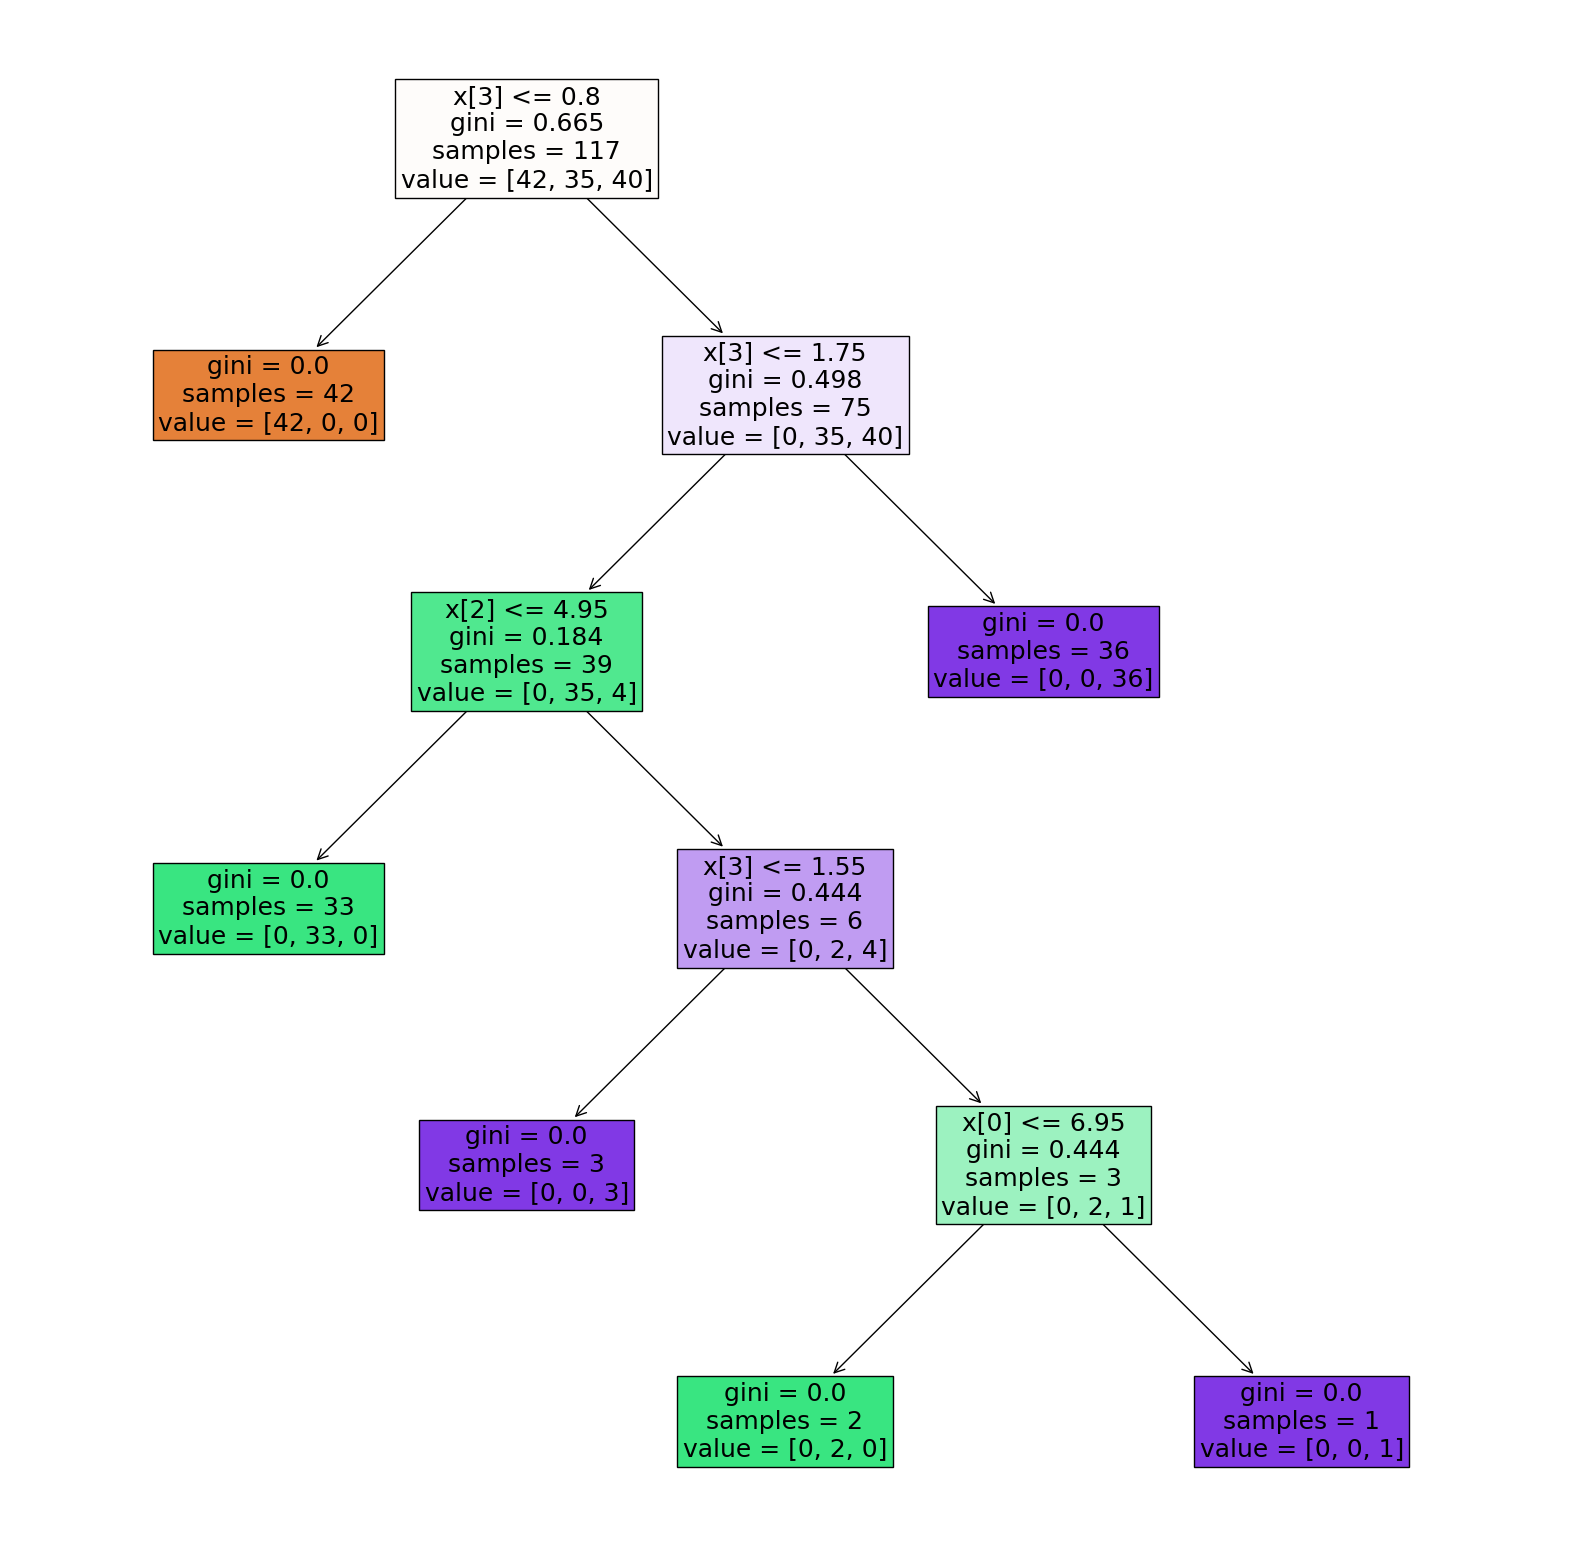

In [54]:
plt.figure(figsize=(20,20))
plot_tree(iris_model,filled=True,fontsize=18)
plt.savefig("Decision_tree_of_iris.png")
plt.show()

### **Prediction**

#### **If we feed new data to this model it will predict right class accordingly**

In [98]:
#finally our iris model is ready
#                [['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
pred=iris_model.predict([[1,5.1,3.5,1.4]])
print(f'The predicted species is : {species[pred[0]]}')

The predicted species is : Iris-versicolor


C:\Users\Dhanush m\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


 ### *<font color='green' > <center>Thank You</center></font>*